<a href="https://colab.research.google.com/github/jgomezfl/AlgorithmsUN2022II/blob/circleci-project-setup/Lab2/jgomezfl_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.3 MB/s 


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import fortranmagic as fm
import time

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 22 µs, sys: 4 µs, total: 26 µs
Wall time: 29.6 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def newmatmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
%%time
newmatmul(a,b)

IndexError: ignored

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
len(a[0]) == len(b)

False

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
newmatmul(a,b)

IndexError: ignored

**My own example 5 - Deifining A and B that are compatiible for multiplcation**

In [ ]:
a5 = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b5 = [[1, 2, 3, 4],
     [2, 3, 4, 5],
      [6, 7, 8, 9]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
newmatmul(a5,b5)

[[23, 29, 35, 41], [32, 41, 50, 59], [59, 77, 95, 113], [9, 12, 15, 18]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(3, 4)
randm

[[0.3757003311392968,
  0.048588641380974185,
  0.08478168018052834,
  0.5072409949895608],
 [0.3088008658681636,
  0.7062205597862199,
  0.22589640225515062,
  0.029588794883133596],
 [0.01839349720378014,
  0.7719034965423391,
  0.13394367263644558,
  0.013052505293708494]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
randa = random_matrix(600,100)
randb = random_matrix(100,600)

In [ ]:
def newmatmuls(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    print("Multiplication ended")

In [ ]:
%%time
newmatmuls(randa,randb)

Multiplication ended
CPU times: user 9.66 s, sys: 35.9 ms, total: 9.69 s
Wall time: 9.86 s


In [ ]:
%%time
for i in range(10):
  newmatmuls(randa,randb)
  randa = random_matrix(600,100)
  randb = random_matrix(100,600)

Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
CPU times: user 1min 29s, sys: 225 ms, total: 1min 30s
Wall time: 1min 30s


In [ ]:
promedioPy = 9100 // 10
promedioPy

910

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd
pyAvg = {
  "Time (ms)": [910]
}

avgExec = pd.DataFrame(pyAvg, index = ["Python"])
avgExec

,Time (ms)
Python,910


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
%%time
randa = np.array(random_matrix(600,100))
randb = np.array(random_matrix(100,600))

for i in range(10):
  randa@randb



CPU times: user 82.4 ms, sys: 7.99 ms, total: 90.4 ms
Wall time: 68.6 ms


In [ ]:
avgExec.loc["Numpy"] = [62.3]
avgExec

,Time (ms)
Python,910.0
Numpy,62.3


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 6.81 s, sys: 66.1 ms, total: 6.87 s
Wall time: 6.86 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 8.01 ms, sys: 0 ns, total: 8.01 ms
Wall time: 8.33 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 136 µs, sys: 5 µs, total: 141 µs
Wall time: 147 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran 
subroutine multmatr(m1,m2,fm1,cm2,cm1,resu)
    double precision, intent(in) :: m1(600,*) 
    double precision, intent(in) :: m2(100,*)
    integer, intent(in) :: fm1,cm1,cm2
    double precision, intent(out) :: resu(fm1,cm2)
    iloop: do i = 1, fm1
      jloop: do j = 1, cm2
        resu(i,j) = 0
        kloop: do k = 1, cm1
          resu(i,j) = resu(i,j) + m1(i,k)*m2(k,j)
        end do kloop
      end do jloop
    end do iloop
end subroutine multmatr

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
%time
mat1 = np.array(random_matrix(600,100))
mat2 = np.array(random_matrix(100,600))

film1= len(mat1)
colm1= len(mat1[0])
colm2= len(mat2[0])

res = multmatr(mat1,mat2,film1,colm2,colm1)
res

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 7.15 µs


array([[28.55665026, 21.87055227, 22.38451582, ..., 25.46184733,
        25.60216683, 27.33647836],
       [25.67883734, 18.96020563, 21.22289461, ..., 22.78162292,
        22.52868209, 25.34934974],
       [24.47027265, 18.37787487, 21.52642866, ..., 23.07245651,
        23.5326845 , 25.67326309],
       ...,
       [26.52524846, 20.17496622, 22.37848114, ..., 23.90068398,
        23.74859074, 26.79993926],
       [26.336948  , 20.91254619, 24.35764638, ..., 25.8060569 ,
        26.90076816, 28.56064163],
       [27.48418173, 21.50529812, 22.06220886, ..., 24.393442  ,
        24.94672041, 26.22169518]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
%%time
tiemForMag = []
for i in range(10):

  film1= len(mat1)
  colm1= len(mat1[0])
  colm2= len(mat2[0])
  multmatr(mat1,mat2,film1,colm2,colm1)

  mat1 = random_matrix(600,100)
  mat2 = random_matrix(100,600)
  print('Multiplication ended')

Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
Multiplication ended
CPU times: user 465 ms, sys: 17.9 ms, total: 483 ms
Wall time: 485 ms


In [ ]:
avgExec.loc["Fortran Magic"] = [465]
avgExec

,Time (ms)
Python,910.0
Numpy,62.3
Fortran Magic,465.0


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%fortran 
subroutine multmatr10(m1,m2,fm1,cm2,cm1,resu)
    double precision, intent(in) :: m1(600,*) 
    double precision, intent(in) :: m2(100,*)
    integer, intent(in) :: fm1,cm1,cm2
    double precision, intent(out) :: resu(fm1,cm2)
    mloop: do m = 1, 10
      iloop: do i = 1, fm1
        jloop: do j = 1, cm2
          resu(i,j) = 0
          kloop: do k = 1, cm1
            resu(i,j) = resu(i,j) + m1(i,k)*m2(k,j)
          end do kloop
        end do jloop
      end do iloop
    end do mloop
end subroutine multmatr10

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
mat1 = np.array(random_matrix(600,100))
mat2 = np.array(random_matrix(100,600))

film1= len(mat1)
colm1= len(mat1[0])
colm2= len(mat2[0])

res = multmatr10(mat1,mat2,film1,colm2,colm1)


CPU times: user 292 ms, sys: 5.94 ms, total: 298 ms
Wall time: 302 ms


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
avgExec.loc["Fortran"] = [289]
avgExec

,Time (ms)
Python,910.0
Numpy,62.3
Fortran Magic,465.0
Fortran,289.0


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile multiplication.c


#include <stdio.h>

int rand();
int main() {
  int matriza[600][100];
  int matrizb[100][600];
  int matrizf[100][100];

//Fill matrix A
for(int i = 0 ; i < 600 ; i++){
    for(int j = 0 ; j < 100 ; j++){
        matriza[i][j] = rand()%10;
      }
    }
// Fill matrix B
for(int i = 0 ; i < 100 ; i++){
    for(int j = 0 ; j < 600 ; j++){
        matrizb[i][j] = rand()%10;
      }
    }


for (int i = 0; i < 100; i++) {
      for (int j = 0; j < 100; j++) {
        int a = 0;
         for (int k = 0; k < 600; k++) {           
            a += matriza[k][j] * matrizb[i][k];
         }
         matrizf[i][j] = a;
      }
   }

/*
for (int i = 0; i < 100; ++i) {
    for (int j = 0; j < 100; ++j) {
        printf("%d  ", matrizf[i][j]);
        if (j == 99){
          printf("\n");
        }
    }
  }
*/
}

Overwriting multiplication.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%shell

gcc multiplication.c -o mul


In [ ]:
%%time
%%shell
./mul

CPU times: user 8.64 ms, sys: 16.2 ms, total: 24.8 ms
Wall time: 136 ms


In [ ]:
%%time
%%shell
./mul

CPU times: user 7.87 ms, sys: 14.1 ms, total: 22 ms
Wall time: 122 ms


In [ ]:
%%time
%%shell
./mul

CPU times: user 4.12 ms, sys: 12.1 ms, total: 16.2 ms
Wall time: 127 ms


In [ ]:
%%time
%%shell
./mul

CPU times: user 6.33 ms, sys: 6.06 ms, total: 12.4 ms
Wall time: 123 ms


In [ ]:
%%time
%%shell
./mul

CPU times: user 6.89 ms, sys: 8.05 ms, total: 14.9 ms
Wall time: 120 ms


In [ ]:
%%time
%%shell
./mul

CPU times: user 7.11 ms, sys: 6.1 ms, total: 13.2 ms
Wall time: 117 ms


In [ ]:
%%time
%%shell
./mul

CPU times: user 6.9 ms, sys: 8.08 ms, total: 15 ms
Wall time: 121 ms


In [ ]:
%%time
%%shell
./mul

CPU times: user 5.74 ms, sys: 14 ms, total: 19.8 ms
Wall time: 123 ms


In [ ]:
%%time
%%shell
./mul

CPU times: user 10.7 ms, sys: 5.08 ms, total: 15.8 ms
Wall time: 121 ms


In [ ]:
%%time
%%shell
./mul

CPU times: user 5.67 ms, sys: 7.17 ms, total: 12.8 ms
Wall time: 123 ms


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
from statistics import mean
totalC = (115, 116, 116, 121, 121, 161, 121, 120, 120, 113)
promedioC = mean(totalC)
promedioC


122.4

In [ ]:
avgExec.loc["C"] = [122.4]
avgExec

,Time (ms)
Python,910.0
Numpy,62.3
Fortran Magic,465.0
Fortran,289.0
C,122.4


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile main.cpp
#include <iostream>
#include <cstdlib>
using namespace std;



int main()
{
  int mat1[100][600];
  int mat2[600][100];

  int resp[100][100];

  for(int i = 0 ; i < 100 ; i++){
    for(int j = 0 ; j < 600 ; j++){
      mat1[i][j] = 1+(rand() % 9);
    }
  }

  for(int i = 0 ; i < 600 ; i++){
    for(int j = 0 ; j < 100 ; j++){
      mat2[i][j] = 1+(rand() % 9);
    }
  }

  for(int i = 0 ; i < 100 ; i++){
    for(int j = 0 ; j < 100 ; j++){
      int aux = 0;
      for(int k = 0 ; k < 600 ; k++){
        aux += mat1[i][k] * mat2[k][j];
      }
      resp[i][j] = aux;
    }
  }

  /*for(int i = 0 ; i < 100 ; i++){
    for(int j = 0 ; j < 100 ; j++){
      cout << resp[i][j] << " ";
    }
    cout << endl;
  }*/

}

Overwriting main.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
%%script bash
g++ main.cpp 
./a.out

CPU times: user 8.66 ms, sys: 8.14 ms, total: 16.8 ms
Wall time: 276 ms


In [ ]:
%%time
%%script bash
g++ main.cpp 
./a.out

CPU times: user 10.1 ms, sys: 4.19 ms, total: 14.3 ms
Wall time: 255 ms


In [ ]:
%%time
%%script bash
g++ main.cpp 
./a.out

CPU times: user 10.2 ms, sys: 8.99 ms, total: 19.2 ms
Wall time: 294 ms


In [ ]:
%%time
%%script bash
g++ main.cpp 
./a.out

CPU times: user 6.51 ms, sys: 14.3 ms, total: 20.8 ms
Wall time: 297 ms


In [ ]:
%%time
%%script bash
g++ main.cpp 
./a.out

CPU times: user 10.5 ms, sys: 14 ms, total: 24.5 ms
Wall time: 316 ms


In [ ]:
%%time
%%script bash
g++ main.cpp 
./a.out

CPU times: user 7.85 ms, sys: 9.13 ms, total: 17 ms
Wall time: 298 ms


In [ ]:
%%time
%%script bash
g++ main.cpp 
./a.out

CPU times: user 7.64 ms, sys: 15.1 ms, total: 22.8 ms
Wall time: 310 ms


In [ ]:
%%time
%%script bash
g++ main.cpp 
./a.out

CPU times: user 7.69 ms, sys: 10.1 ms, total: 17.8 ms
Wall time: 305 ms


In [ ]:
%%time
%%script bash
g++ main.cpp 
./a.out

CPU times: user 13 ms, sys: 9.09 ms, total: 22.1 ms
Wall time: 295 ms


In [ ]:
%%time
%%script bash
g++ main.cpp 
./a.out

CPU times: user 5.9 ms, sys: 8.16 ms, total: 14.1 ms
Wall time: 275 ms


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
from statistics import mean
totalCmasmas = (128, 126, 85.6, 151, 116, 137, 145, 147, 104, 106)
promedioCmasmas = mean(totalCmasmas)
promedioCmasmas

124.56

In [ ]:
avgExec.loc["C++"] = [124.56]
avgExec

,Time (ms)
Python,910.00
Numpy,62.30
Fortran Magic,465.00
Fortran,289.00
C,122.40
C++,124.56


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
# Run and print a shell command.
def run(cmd):
  print('>> {}'.format(cmd))
  !{cmd}  # This is magic to run 'cmd' in the shell.
  print('')

# Copy the input file into the local filesystem.
run('mkdir -p data')
run('gsutil cp gs://dataflow-samples/shakespeare/kinglear.txt data/')

>> mkdir -p data

>> gsutil cp gs://dataflow-samples/shakespeare/kinglear.txt data/
Copying gs://dataflow-samples/shakespeare/kinglear.txt...
/ [1 files][153.6 KiB/153.6 KiB]                                                
Operation completed over 1 objects/153.6 KiB.                                    



In [ ]:
# Update and upgrade the system before installing anything else.
run('apt-get update > /dev/null')
run('apt-get upgrade > /dev/null')

# Install the Java JDK.
run('apt-get install default-jdk > /dev/null')

# Check the Java version to see if everything is working well.
run('javac -version')

>> apt-get update > /dev/null

>> apt-get upgrade > /dev/null

>> apt-get install default-jdk > /dev/null

>> javac -version
javac 11.0.16



In [ ]:
import os

# Download the gradle source.
gradle_version = 'gradle-5.0'
gradle_path = f"/opt/{gradle_version}"
if not os.path.exists(gradle_path):
  run(f"wget -q -nc -O gradle.zip https://services.gradle.org/distributions/{gradle_version}-bin.zip")
  run('unzip -q -d /opt gradle.zip')
  run('rm -f gradle.zip')

# We're choosing to use the absolute path instead of adding it to the $PATH environment variable.
def gradle(args):
  run(f"{gradle_path}/bin/gradle --console=plain {args}")

gradle('-v')

>> /opt/gradle-5.0/bin/gradle --console=plain -v

------------------------------------------------------------
Gradle 5.0
------------------------------------------------------------

Build time:   2018-11-26 11:48:43 UTC
Revision:     7fc6e5abf2fc5fe0824aec8a0f5462664dbcd987

Kotlin DSL:   1.0.4
Kotlin:       1.3.10
Groovy:       2.5.4
Ant:          Apache Ant(TM) version 1.9.13 compiled on July 10 2018
JVM:          11.0.16 (Ubuntu 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OS:           Linux 5.4.188+ amd64




In [ ]:
%%writefile build.gradle

plugins {
  // id 'idea'     // Uncomment for IntelliJ IDE
  // id 'eclipse'  // Uncomment for Eclipse IDE

  // Apply java plugin and make it a runnable application.
  id 'java'
  id 'application'

  // 'shadow' allows us to embed all the dependencies into a fat jar.
  id 'com.github.johnrengelman.shadow' version '4.0.3'
}

// This is the path of the main class, stored within ./src/main/java/
mainClassName = 'samples.quickstart.WordCount'

// Declare the sources from which to fetch dependencies.
repositories {
  mavenCentral()
}

// Java version compatibility.
sourceCompatibility = 1.8
targetCompatibility = 1.8

// Use the latest Apache Beam major version 2.
// You can also lock into a minor version like '2.9.+'.
ext.apacheBeamVersion = '2.+'

// Declare the dependencies of the project.
dependencies {
  shadow "org.apache.beam:beam-sdks-java-core:$apacheBeamVersion"

  runtime "org.apache.beam:beam-runners-direct-java:$apacheBeamVersion"
  runtime "org.slf4j:slf4j-api:1.+"
  runtime "org.slf4j:slf4j-jdk14:1.+"

  testCompile "junit:junit:4.+"
}

// Configure 'shadowJar' instead of 'jar' to set up the fat jar.
shadowJar {
  baseName = 'WordCount'  // Name of the fat jar file.
  classifier = null       // Set to null, otherwise 'shadow' appends a '-all' to the jar file name.
  manifest {
    attributes('Main-Class': mainClassName)  // Specify where the main class resides.
  }
}

Overwriting build.gradle


In [ ]:
run('mkdir -p src/main/java/samples/quickstart')

>> mkdir -p src/main/java/samples/quickstart



In [ ]:
%%writefile src/main/java/samples/quickstart/WordCount.java

package samples.quickstart;
import java.util.Arrays;
import java.lang.Math;

public class WordCount {
  public static void main(String[] args) {

    int [][] mat1 = new int [100][600];
    int [][] mat2 = new int [600][100];

    int [][] resp = new int [100][100];

    for(int i = 0 ; i < 100 ; i++){
      for(int j = 0 ; j < 600 ; j++){
        mat1[i][j] = (int) (Math.random()*(9-1)) + 1;
      }
    }

    for(int i = 0 ; i < 600 ; i++){
      for(int j = 0 ; j < 100 ; j++){
        mat2[i][j] = (int) (Math.random()*(9-1)) + 1;
      }
    }
    
    for(int i = 0 ; i < 100 ; i++){
      for(int j = 0 ; j < 100 ; j++){
        int aux = 0;
        for(int k = 0 ; k < 600 ; k++){
          aux += mat1[i][k] * mat2[k][j];
        }
        resp[i][j] = aux;
      }
    }
  }
}

Overwriting src/main/java/samples/quickstart/WordCount.java


In [ ]:
# Build the project.
gradle('build')

# Check the generated build files.
run('ls -lh build/libs/')

>> /opt/gradle-5.0/bin/gradle --console=plain build
> Task :compileJava UP-TO-DATE
> Task :processResources NO-SOURCE
> Task :classes UP-TO-DATE
> Task :jar UP-TO-DATE
> Task :startScripts UP-TO-DATE
> Task :distTar UP-TO-DATE
> Task :distZip UP-TO-DATE
> Task :shadowJar UP-TO-DATE
> Task :startShadowScripts UP-TO-DATE
> Task :shadowDistTar UP-TO-DATE
> Task :shadowDistZip UP-TO-DATE
> Task :assemble UP-TO-DATE
> Task :compileTestJava NO-SOURCE
> Task :processTestResources NO-SOURCE
> Task :testClasses UP-TO-DATE
> Task :test NO-SOURCE
> Task :check UP-TO-DATE
> Task :build UP-TO-DATE

BUILD SUCCESSFUL in 1s
9 actionable tasks: 9 up-to-date

>> ls -lh build/libs/
total 43M
-rw-r--r-- 1 root root 1.3K Sep  5 00:04 content.jar
-rw-r--r-- 1 root root  43M Sep  5 00:04 WordCount.jar



**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
run('cp build/libs/WordCount.jar .')
run('java -jar WordCount.jar')

>> cp build/libs/WordCount.jar .

>> java -jar WordCount.jar

CPU times: user 13.4 ms, sys: 19.1 ms, total: 32.6 ms
Wall time: 346 ms


In [ ]:
%%time
run('cp build/libs/WordCount.jar .')
run('java -jar WordCount.jar')

>> cp build/libs/WordCount.jar .

>> java -jar WordCount.jar

CPU times: user 20.8 ms, sys: 28.2 ms, total: 49 ms
Wall time: 361 ms


In [ ]:
%%time
run('cp build/libs/WordCount.jar .')
run('java -jar WordCount.jar')

>> cp build/libs/WordCount.jar .

>> java -jar WordCount.jar

CPU times: user 22.1 ms, sys: 28.3 ms, total: 50.4 ms
Wall time: 362 ms


In [ ]:
%%time
run('cp build/libs/WordCount.jar .')
run('java -jar WordCount.jar')

>> cp build/libs/WordCount.jar .

>> java -jar WordCount.jar

CPU times: user 16.8 ms, sys: 27.2 ms, total: 44 ms
Wall time: 354 ms


In [ ]:
%%time
run('cp build/libs/WordCount.jar .')
run('java -jar WordCount.jar')

>> cp build/libs/WordCount.jar .

>> java -jar WordCount.jar

CPU times: user 17.5 ms, sys: 24.2 ms, total: 41.7 ms
Wall time: 349 ms


In [ ]:
%%time
run('cp build/libs/WordCount.jar .')
run('java -jar WordCount.jar')

>> cp build/libs/WordCount.jar .

>> java -jar WordCount.jar

CPU times: user 22.8 ms, sys: 21.1 ms, total: 44 ms
Wall time: 355 ms


In [ ]:
%%time
run('cp build/libs/WordCount.jar .')
run('java -jar WordCount.jar')

>> cp build/libs/WordCount.jar .

>> java -jar WordCount.jar

CPU times: user 19.8 ms, sys: 20.1 ms, total: 39.9 ms
Wall time: 352 ms


In [ ]:
%%time
run('cp build/libs/WordCount.jar .')
run('java -jar WordCount.jar')

>> cp build/libs/WordCount.jar .

>> java -jar WordCount.jar

CPU times: user 18.7 ms, sys: 24.3 ms, total: 42.9 ms
Wall time: 362 ms


In [ ]:
%%time
run('cp build/libs/WordCount.jar .')
run('java -jar WordCount.jar')

>> cp build/libs/WordCount.jar .

>> java -jar WordCount.jar

CPU times: user 17.5 ms, sys: 36.3 ms, total: 53.8 ms
Wall time: 373 ms


In [ ]:
%%time
run('cp build/libs/WordCount.jar .')
run('java -jar WordCount.jar')

>> cp build/libs/WordCount.jar .

>> java -jar WordCount.jar

CPU times: user 22.9 ms, sys: 31.9 ms, total: 54.8 ms
Wall time: 376 ms


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
from statistics import mean
totalJava = (401, 342, 256, 347, 308, 313, 350, 291, 306, 322)
promedioJava = mean(totalJava)
promedioJava

323.6

In [ ]:
avgExec.loc["Java"] = [promedioJava]
avgExec

,Time (ms)
Python,910.00
Numpy,62.30
Fortran Magic,465.00
Fortran,289.00
C,122.40
C++,124.56
Java,323.60


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!npm install -g npm@latest
!npm cache verify
!npm install -g --unsafe-perm ijavascript
!ijsinstall --install=global
!jupyter-kernelspec list


changed 16 packages, and audited 212 packages in 2s

11 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities
Cache verified and compressed (~/.npm/_cacache)
Content verified: 92 (27502770 bytes)
Index entries: 93
Finished in 0.477s
npm WARN deprecated uuid@3.4.0: Please upgrade  to version 7 or higher.  Older versions may use Math.random() in certain circumstances, which is known to be problematic.  See https://v8.dev/blog/math-random for details.

changed 8 packages, and audited 9 packages in 37s

found 0 vulnerabilities
Available kernels:
  ir            /usr/local/share/jupyter/kernels/ir
  javascript    /usr/local/share/jupyter/kernels/javascript
  python3       /usr/local/share/jupyter/kernels/python3


In [ ]:
%%javascript
var { spawn } = require('child_process');
var sh = (cmd) => {
    $$.async();
    var sp = spawn(cmd, { cwd: process.cwd(), stdio: 'pipe', shell: true, encoding: 'utf-8' });
    sp.stdout.on('data', data => console.log(data.toString()));
    sp.stderr.on('data', data => console.error(data.toString()));
    sp.on('close', () => $$.done());
};

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
sh('npm init -y');
sh('node -v; npm -v');
sh('npm install @tensorflow/tfjs-node-gpu');

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
function dotArray(mat1, mat2){
  var res = [];
  for(var i = 0 ; i < 100; i++){
    var fil = []
    for(var j = 0 ; j < 100 ; j++){
      var aux = 0;
      for(int k = 0 ; k < 600 ; k++){
        aux = aux + (mat1[i][k]*mat2[k][j]);
      }
      fil.push(aux);
    }
    res.push(fil)
  }
  return res;
}

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
function matriz1(){
  var mat1 = [];
  for(var i = 0 ; i < 100 ; i++){
    var fil = [];
    for(var j = 0 ; j < 600 ; j++){
      fil.push(Math.random() * (9 - 1));
    }
    mat.push(fil);
  }
  return mat1;
}

<IPython.core.display.Javascript object>

In [ ]:
%%javascript
function matriz2(){
  var mat1 = [];
  for(var i = 0 ; i < 600 ; i++){
    var fil = [];
    for(var j = 0 ; j < 100 ; j++){
      fil.push(Math.random() * (9 - 1));
    }
    mat.push(fil);
  }
  return mat1;
}

<IPython.core.display.Javascript object>

**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%time
%%javascript
mat1 = matriz1();
mat2 = matriz2();

dotArray(mat1,mat2);

<IPython.core.display.Javascript object>

CPU times: user 3.82 ms, sys: 0 ns, total: 3.82 ms
Wall time: 3.79 ms


In [ ]:
%%time
%%javascript
mat1 = matriz1();
mat2 = matriz2();

dotArray(mat1,mat2);

<IPython.core.display.Javascript object>

CPU times: user 3.56 ms, sys: 1.96 ms, total: 5.52 ms
Wall time: 6.27 ms


In [ ]:
%%time
%%javascript
mat1 = matriz1();
mat2 = matriz2();

dotArray(mat1,mat2);

<IPython.core.display.Javascript object>

CPU times: user 4.53 ms, sys: 0 ns, total: 4.53 ms
Wall time: 4.59 ms


In [ ]:
%%time
%%javascript
mat1 = matriz1();
mat2 = matriz2();

dotArray(mat1,mat2);

<IPython.core.display.Javascript object>

CPU times: user 2.62 ms, sys: 0 ns, total: 2.62 ms
Wall time: 2.68 ms


In [ ]:
%%time
%%javascript
mat1 = matriz1();
mat2 = matriz2();

dotArray(mat1,mat2);

<IPython.core.display.Javascript object>

CPU times: user 9.73 ms, sys: 1.97 ms, total: 11.7 ms
Wall time: 12.9 ms


In [ ]:
%%time
%%javascript
mat1 = matriz1();
mat2 = matriz2();

dotArray(mat1,mat2);

<IPython.core.display.Javascript object>

CPU times: user 4.22 ms, sys: 7 µs, total: 4.23 ms
Wall time: 6.93 ms


In [ ]:
%%time
%%javascript
mat1 = matriz1();
mat2 = matriz2();

dotArray(mat1,mat2);

<IPython.core.display.Javascript object>

CPU times: user 3.93 ms, sys: 0 ns, total: 3.93 ms
Wall time: 7.71 ms


In [ ]:
%%time
%%javascript
mat1 = matriz1();
mat2 = matriz2();

dotArray(mat1,mat2);

<IPython.core.display.Javascript object>

CPU times: user 4.06 ms, sys: 1 µs, total: 4.06 ms
Wall time: 5.34 ms


In [ ]:
%%time
%%javascript
mat1 = matriz1();
mat2 = matriz2();

dotArray(mat1,mat2);

<IPython.core.display.Javascript object>

CPU times: user 3.72 ms, sys: 27 µs, total: 3.75 ms
Wall time: 5.34 ms


In [ ]:
%%time
%%javascript
mat1 = matriz1();
mat2 = matriz2();

dotArray(mat1,mat2);

<IPython.core.display.Javascript object>

CPU times: user 6.5 ms, sys: 0 ns, total: 6.5 ms
Wall time: 9.87 ms


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
from statistics import mean
totalJavaScript = (38.6, 34, 65.2, 35.5, 34.2, 40.9, 38.6, 45.3, 37.7, 37.7)
promedioJavaScript = mean(totalJavaScript)
promedioJavaScript

40.77

In [ ]:
avgExec.loc["JavaScript"] = [promedioJavaScript]
avgExec

,Time (ms)
Python,910.00
Numpy,62.30
Fortran Magic,465.00
Fortran,289.00
C,122.40
C++,124.56
Java,323.60
JavaScript,40.77


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
avgExec.min()

Time (ms)    40.77
dtype: float64

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
avgExec["SpeedFactor"] = avgExec['Time (ms)'].apply(lambda x: x/avgExec.min())


In [ ]:
avgExec

,Time (ms),SpeedFactor
Python,910.00,22.320334
Numpy,62.30,1.528084
Fortran Magic,465.00,11.405445
Fortran,289.00,7.088545
C,122.40,3.002208
C++,124.56,3.055188
Java,323.60,7.937209
JavaScript,40.77,1.000000


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
avgExec.sort_values("Time (ms)")

,Time (ms),SpeedFactor
JavaScript,40.77,1.000000
Numpy,62.30,1.528084
C,122.40,3.002208
C++,124.56,3.055188
Fortran,289.00,7.088545
Java,323.60,7.937209
Fortran Magic,465.00,11.405445
Python,910.00,22.320334


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 583 µs, sys: 24 µs, total: 607 µs
Wall time: 581 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 2.61 ms, sys: 0 ns, total: 2.61 ms
Wall time: 1.88 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 130 µs, sys: 6 µs, total: 136 µs
Wall time: 141 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements  

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

[Aquí está el csv para que toda la vaina funcione ;D](https://drive.google.com/file/d/1pi8Bk3aeZhaZ10TZwSQapwl3pZTciFHo/view?usp=sharing)

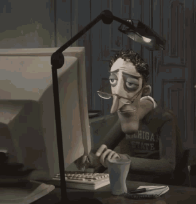

In [ ]:
import pandas as pd
motos = pd.read_csv('Encuesta_Motociclistas.csv')
motos

,uuid,municipio,estrato_vivienda,hombre,sin_grupo_etnico,etnia_afrocolombiano,edad_grupo,nivel_educativo,moto_street,moto_scooter,...,epp_guantes,epp_botas,epp_rodilleras,epp_reflectivos,epp_chaquetaprot,epp_chaquetairbag,con_acompañantes,con_acompañantes_menores,perfil_siniestros1,perfil_comparendos1
0,1_10_1,MEDELLÍN,2.0,1,1,0,41-45,Secundaria,1,0,...,0,1,0,0,1,0,1,0.0,1,1
1,1_10_10,MEDELLÍN,3.0,1,1,0,36-40,Secundaria,1,0,...,0,0,0,1,0,0,0,NaN,1,1
2,1_10_100,MEDELLÍN,3.0,1,1,0,31-35,Técnica / Tecnológica,1,0,...,0,0,0,1,0,0,1,0.0,1,1
3,1_10_1000,MEDELLÍN,3.0,1,1,0,31-35,Secundaria,1,0,...,0,0,0,0,0,0,0,NaN,1,1
4,1_10_1001,MEDELLÍN,4.0,1,1,0,41-45,Universitaria o postgrado,0,0,...,0,0,0,0,0,0,0,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25112,5_7_3150,CUNDINAMARCA,2.0,1,1,0,31-35,Técnica / Tecnológica,0,0,...,0,0,0,0,0,0,1,0.0,1,1
25113,5_7_3151,CUNDINAMARCA,3.0,1,1,0,56-60,Técnica / Tecnológica,0,0,...,0,0,0,0,0,0,0,NaN,1,0
25114,5_7_3152,CUNDINAMARCA,4.0,1,1,0,46-50,Universitaria o postgrado,0,0,...,0,0,0,0,0,0,1,1.0,0,0
25115,5_7_3153,CUNDINAMARCA,4.0,1,1,0,46-50,Universitaria o postgrado,0,0,...,1,0,0,0,0,0,0,NaN,1,0


In [ ]:
motos.head()

,uuid,municipio,estrato_vivienda,hombre,sin_grupo_etnico,etnia_afrocolombiano,edad_grupo,nivel_educativo,moto_street,moto_scooter,...,epp_guantes,epp_botas,epp_rodilleras,epp_reflectivos,epp_chaquetaprot,epp_chaquetairbag,con_acompañantes,con_acompañantes_menores,perfil_siniestros1,perfil_comparendos1
0,1_10_1,MEDELLÍN,2.0,1,1,0,41-45,Secundaria,1,0,...,0,1,0,0,1,0,1,0.0,1,1
1,1_10_10,MEDELLÍN,3.0,1,1,0,36-40,Secundaria,1,0,...,0,0,0,1,0,0,0,NaN,1,1
2,1_10_100,MEDELLÍN,3.0,1,1,0,31-35,Técnica / Tecnológica,1,0,...,0,0,0,1,0,0,1,0.0,1,1
3,1_10_1000,MEDELLÍN,3.0,1,1,0,31-35,Secundaria,1,0,...,0,0,0,0,0,0,0,NaN,1,1
4,1_10_1001,MEDELLÍN,4.0,1,1,0,41-45,Universitaria o postgrado,0,0,...,0,0,0,0,0,0,0,NaN,1,1


In [ ]:
motos.dtypes

uuid                             object
municipio                        object
estrato_vivienda                float64
hombre                            int64
sin_grupo_etnico                  int64
etnia_afrocolombiano              int64
edad_grupo                       object
nivel_educativo                  object
moto_street                       int64
moto_scooter                      int64
moto_deportiva                    int64
cilin_grupo                      object
modelo_grupo                     object
frenos_disco                      int64
frenos_mixto                      int64
frenos_tambor                     int64
tec_frenado                      object
dias_semana                       int64
sector_comercio                   int64
sector_servicios                  int64
sector_transporte                 int64
herramienta_trabajo               int64
transporte_cotidiano              int64
trabajo_domicilios              float64
trabajo_transporte_pasajeros    float64


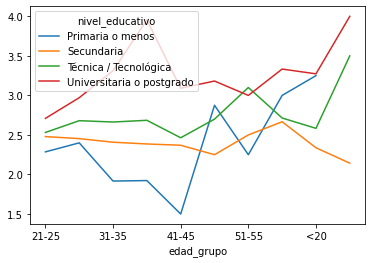

In [ ]:
metrallo = motos[motos.municipio == 'MEDELLÍN']
metrallo.groupby(["edad_grupo", "nivel_educativo"])["estrato_vivienda"].mean().unstack().ffill().plot();

In [ ]:
def diferencia_estratos(group):
  precios_estrato_sin_null = pd.DataFrame(group.dropna())
  hombres = precios_estrato_sin_null.loc[:, 1]
  mujeres = precios_estrato_sin_null.loc[:, 0]
  diff = abs(hombres-mujeres)
  return diff

def precios_por_estrato(df):
    return (
        df
        .groupby(['dias_semana', 'hombre'])['estrato_vivienda'].mean().unstack().ffill())

In [ ]:
asdf = precios_por_estrato(metrallo)
diferencia_estratos(asdf)


dias_semana
2    0.167742
3    0.535714
4    2.153846
5    0.061813
6    0.032860
7    0.086078
dtype: float64

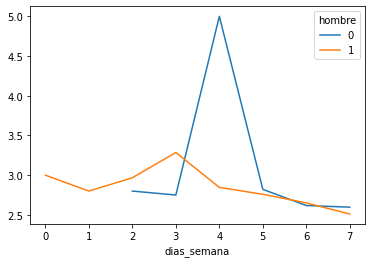

In [ ]:
asdf.plot()

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

ModuleNotFoundError: ignored

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!